In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

In [2]:
prefix = "../build/"

df = pd.read_csv(prefix+"data.csv")
df.columns = ['x', 'y', 'z', 'x_std', 'y_std', 'z_std','gnd_x','gnd_y','gnd_z','time']
df["x+"] = df["x"] + df["x_std"]
df["y+"] = df["y"] + df["y_std"]
df["z+"] = df["z"] + df["z_std"]
df["x-"] = df["x"] - df["x_std"]
df["y-"] = df["y"] - df["y_std"]
df["z-"] = df["z"] - df["z_std"]

df.head()


,x,y,z,x_std,y_std,z_std,gnd_x,gnd_y,gnd_z,time,x+,y+,z+,x-,y-,z-
0,-2.662120,-0.122962,2.418760,0.029606,0.025859,0.027537,0.409964,-0.787591,1.083640,8,-2.632514,-0.097103,2.446297,-2.691726,-0.148821,2.391223
1,-1.837310,-0.538962,1.589140,0.028008,0.025525,0.026683,0.700596,-1.089160,0.495088,2,-1.809302,-0.513437,1.615823,-1.865318,-0.564488,1.562457
2,-2.637110,-1.230300,3.215180,0.029015,0.027502,0.028576,0.157069,-1.284290,0.238154,2,-2.608095,-1.202797,3.243756,-2.666125,-1.257802,3.186604
3,-0.889002,-1.068690,-0.081554,0.027432,0.025084,0.025694,1.081000,-1.528610,-0.956303,2,-0.861569,-1.043606,-0.055860,-0.916434,-1.093774,-0.107248
4,-0.462486,1.260230,-3.884120,0.027397,0.028626,0.025913,1.261150,-0.223599,-0.522960,2,-0.435089,1.288856,-3.858207,-0.489883,1.231604,-3.910033


<IPython.core.display.Javascript object>


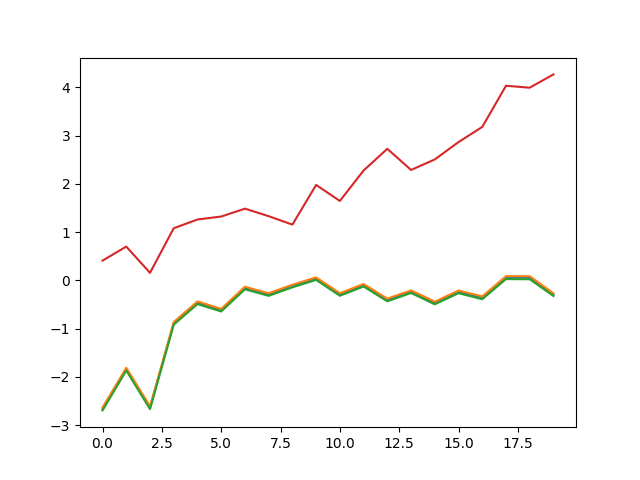

<IPython.core.display.Javascript object>


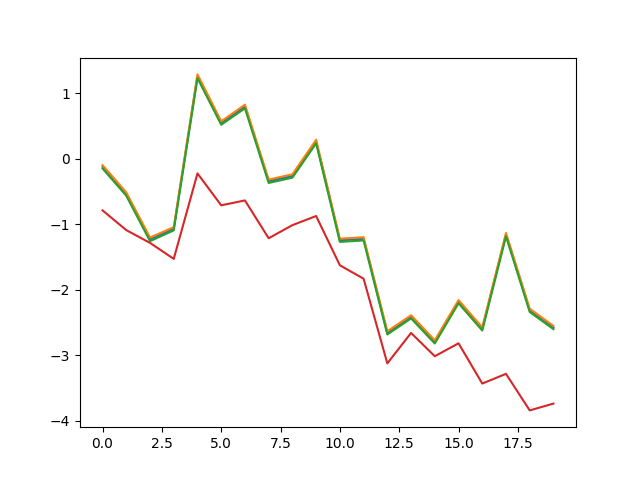

<IPython.core.display.Javascript object>


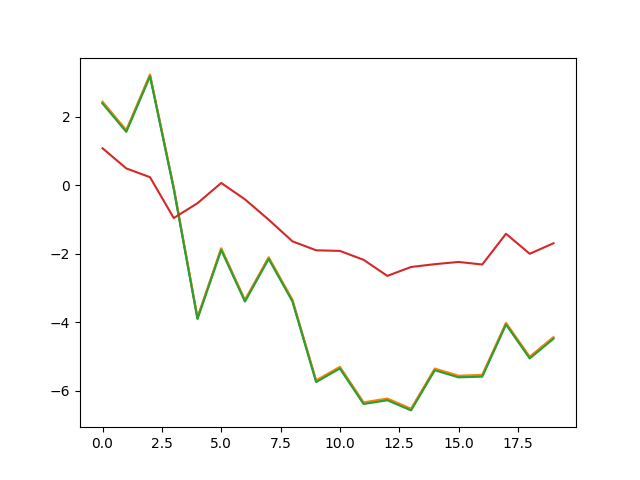

In [3]:
plt.plot(df.index, df['x'])
plt.plot(df.index, df['x+'])
plt.plot(df.index, df['x-'])
plt.plot(df.index, df['gnd_x'])

plt.figure()

plt.plot(df.index, df['y'])
plt.plot(df.index, df['y+'])
plt.plot(df.index, df['y-'])
plt.plot(df.index, df['gnd_y'])


plt.figure()

plt.plot(df.index, df['z'])
plt.plot(df.index, df['z+'])
plt.plot(df.index, df['z-'])
plt.plot(df.index, df['gnd_z'])

plt.show()


<IPython.core.display.Javascript object>


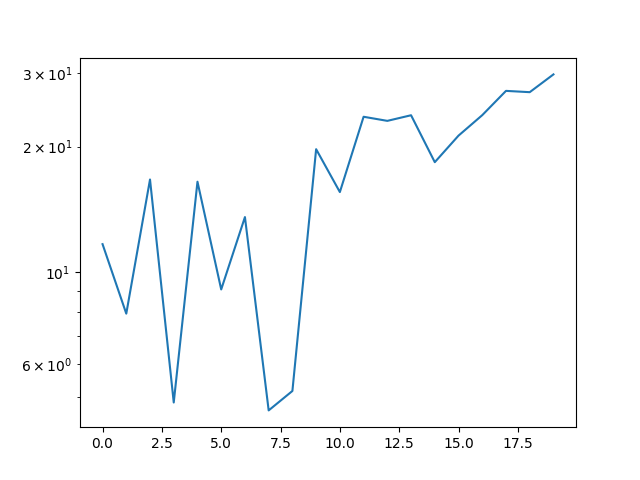

In [4]:
se = (df["x"]-df["gnd_x"])**2 + (df["y"]-df["gnd_y"])**2 + (df["z"]-df["gnd_z"])**2
mse = sum(se)

plt.figure()
plt.yscale("log")
plt.plot(df.index, se)
plt.show()

<IPython.core.display.Javascript object>


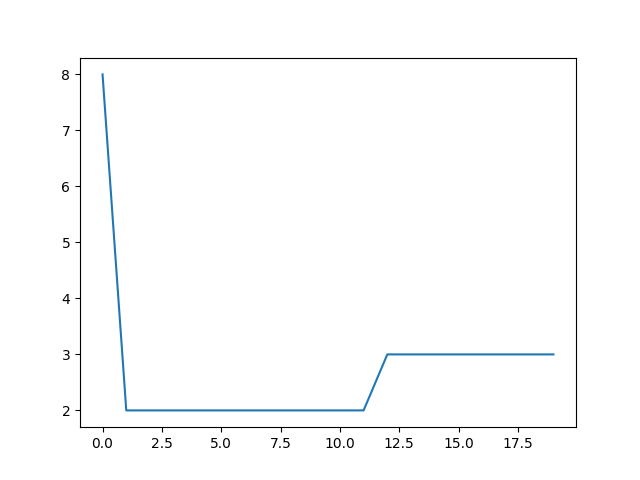

In [5]:
plt.figure()
plt.plot(df.index, df['time'])
plt.show()

In [6]:
anchors = pd.read_csv(prefix+"anchors.csv")
anchors.columns = ['x','y','z']
anchors.head()


,x,y,z
0,-0.487863,-4.347270,2.737160
1,-4.300760,0.133078,2.979340
2,0.134424,-2.106550,1.850130
3,0.802798,8.498710,1.486880
4,4.083850,3.133630,-0.511368


<IPython.core.display.Javascript object>


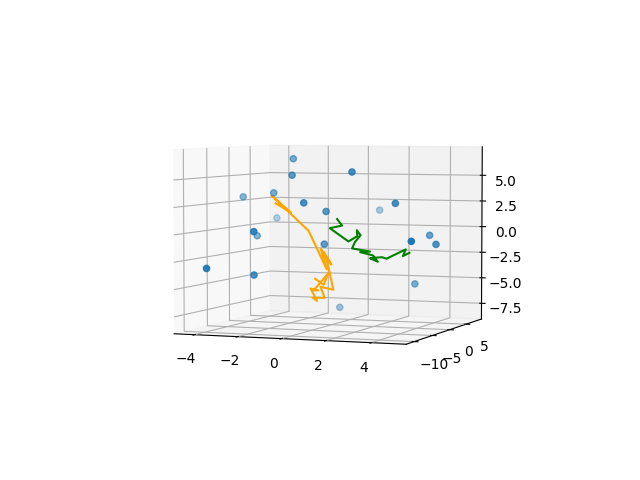

In [7]:
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(anchors['x'], anchors['y'], anchors['z'])
ax.plot(df['x'],df['y'],df['z'], c="orange")
ax.plot(df['gnd_x'],df['gnd_y'],df['gnd_z'], c="green")

